### Your name:

Joan Soo Li Lim

### Collaborators:

None.

In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Classification

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

- Explore the data
- Make sure you build a full data pipeline
- Do you require any data pre-processing? Are all the features useful? (Use only raw features)
- set the random seed to 123 (For splitting or any other random algorithm)
- Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {4, 5, 10, 20, 50} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 5, 10, 20} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 5-folds

- Other paramenters -> Use default

### Load data

In [2]:
df = pd.read_excel("defaultofcreditcardclients.xls", 
                   sheet = 0, skiprows= 1, header = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

### Explore data

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
# Change PAY_0 to PAY_1. Seems to be a labelling error.
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Looking at the categories

In [6]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [7]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [8]:
# The authors don't indicate what categories 0, 5, and 6 mean. As well, their frequencies are quite low.
# As such, I am collapsing as they suggested in their documentation:
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
df['EDUCATION'].where(df['EDUCATION'] < 4, 4.0, inplace=True)
df['EDUCATION'].where(df['EDUCATION'] > 0, 4.0, inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [9]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [10]:
# The authors don't indicate what categories 0 mean. As well, their frequencies are quite low.
# As such, I am collapsing as they suggested in their documentation:
# 11 = married; 2 = single; 3 = others
df['MARRIAGE'].where(df['MARRIAGE'] > 0, 3.0, inplace=True)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

#### Looking at plots for trends

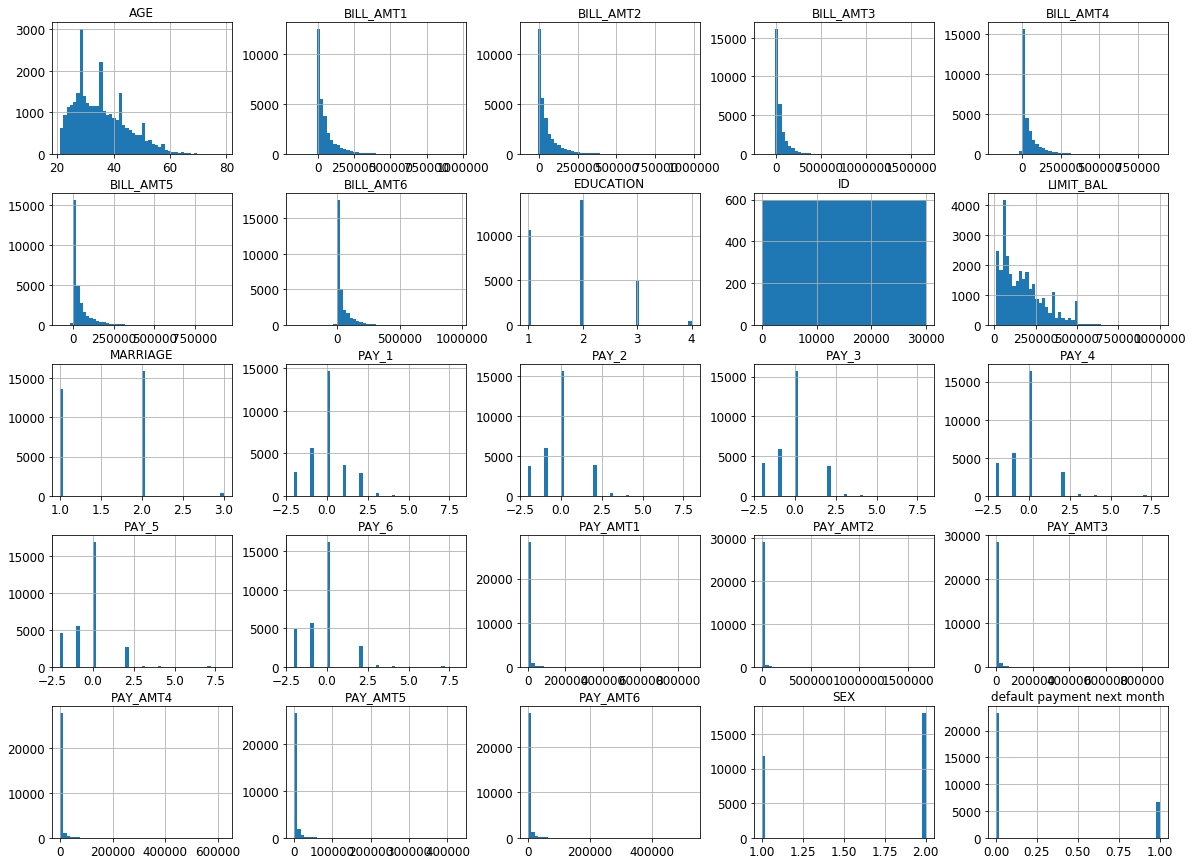

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#### Overall Observations

1. The authors of the paper did not disclose what -2 or 0 means for the PAY_n columns. I considered collapsing them, but opted not to as the frequencies are high(er) than PAY_n for n>0. I am guessing that this means paying 2 months in advance? And 0 means paying on the due date? Who knows. Maybe we could have a new statistic such as average of the months to pay.
2. ID column is meangingless. To be removed (see below).
3. Max pay = 8.0 for all PAY_n, n>0. Seems that we default after 8 months? I would trend more carefully those periods by perhaps introducing a new statistic for each month such as the (1) percentage difference in amount paid and amt of statement or (2) percentage difference in amount paid and total credit or (3) number of late payments in previous months (i.e. add up number of times PAY_n > 0) or (4) total number of late months (i.e. add up totals in columns PAY_n). I think (1) is a much better statistic than simply noting the BILL_AMT_n or PAY_AMT_n as-is.  
4. Other stats (as seen in the describe call and plots) are fairly basic. Some surprises: some bill amounts are negative. What does that mean? Also, approx. 22% of the clients defaulted on their next month payment.


### Data preparation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

debug = False

# Remove ID from data. There is no point to this column.
df_no_id = df.drop("ID", axis=1) 

# Split into training and test sets.
data_train, data_test = train_test_split(df_no_id, 
                                         test_size=0.2, 
                                         random_state=123)
  
# Create labels for training set    
df_train = data_train.drop("default payment next month", axis=1) 
df_train_labels = data_train["default payment next month"].copy() 

if (debug):
    print(len(data_train), "train +", len(data_test), "test")
    print (data_train.head())
    print (data_test.head())
    print ("------------------------")
    print (df_train.head())
    print (df_train_labels.head())

In [13]:
# Check any NULLs
df_train[df_train.isnull().any(axis=1)].head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6


In [14]:
#### Just making sure we have values for each category. Not sure if split does this automatically? ####

In [15]:
df_train['SEX'].value_counts()

2    14475
1     9525
Name: SEX, dtype: int64

In [16]:
df_train['EDUCATION'].value_counts()

2    11198
1     8494
3     3938
4      370
Name: EDUCATION, dtype: int64

In [17]:
df_train['MARRIAGE'].value_counts()

2    12798
1    10905
3      297
Name: MARRIAGE, dtype: int64

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [19]:
# Create pipeline
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, OneHotEncoder

df_attribs = list(set(df_train))
num_attribs = [e for e in df_attribs if e not in ('SEX', 'EDUCATION', 'MARRIAGE')]
cat_attribs = "SEX EDUCATION MARRIAGE".split()

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        # Not really needed as no NULLs but left it in anyhow.
        ('imputer', Imputer(strategy="median")),       
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),     
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [20]:
df_prepared = full_pipeline.fit_transform(df_train)
df_prepared[0]

array([1.50000e+03, 1.03173e+05, 4.60000e+01, 0.00000e+00, 0.00000e+00,
       5.00000e+03, 1.04137e+05, 2.00000e+05, 0.00000e+00, 3.30000e+03,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 6.51080e+04, 2.93000e+03,
       9.52060e+04, 3.69200e+03, 1.06651e+05, 1.03422e+05, 2.50000e+03,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00])

In [21]:
# Should be have less columns from the one-hots due to decreasing the amount of categories.
df_prepared.shape

(24000, 29)

In [22]:
# ROC curve
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [23]:
# Use Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=123)
param_grid = {'n_estimators': [4, 5, 10, 20, 50]}

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid , cv=5, scoring='roc_auc')

grid_search_rf.fit(df_prepared, df_train_labels)
    
# Results of the grid search for best n_estimator
print(grid_search_rf.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'n_estimators': 50}
------------
0.687846841267909 {'n_estimators': 4}
0.6987119061503807 {'n_estimators': 5}
0.7258674356955472 {'n_estimators': 10}
0.7439809525809861 {'n_estimators': 20}
0.7552033528339813 {'n_estimators': 50}


In [24]:
# Use KNN 
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 10, 20]}

grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid , cv=5, scoring='roc_auc')
grid_search_knn.fit(df_prepared, df_train_labels)
    
# Results of the grid search for best n_estimator
print(grid_search_knn.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'n_neighbors': 20}
------------
0.5821565243193594 {'n_neighbors': 3}
0.6006798946294735 {'n_neighbors': 5}
0.62667678062411 {'n_neighbors': 10}
0.6442656740881241 {'n_neighbors': 20}


In [25]:
from sklearn.model_selection import cross_val_predict

forest_clf = grid_search_rf.best_estimator_
y_probas_forest = cross_val_predict(forest_clf, df_prepared, df_train_labels, cv=5, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(df_train_labels, y_scores_forest)

knn_clf = grid_search_knn.best_estimator_
y_probas_knn = cross_val_predict(knn_clf, df_prepared, df_train_labels, cv=5, method="predict_proba")
y_scores_knn = y_probas_knn[:, 1] 
fpr_knn, tpr_knn, thresholds_knn = roc_curve(df_train_labels, y_scores_knn)

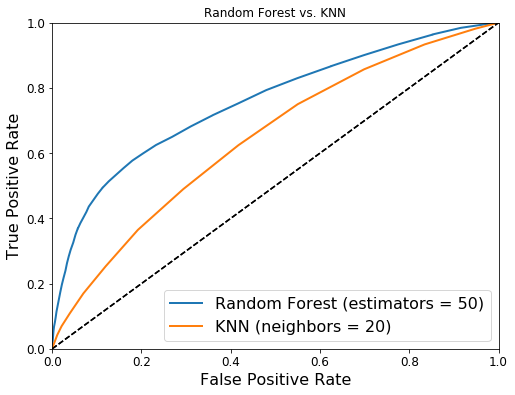

In [26]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest (estimators = 50)")
plot_roc_curve(fpr_knn, tpr_knn, "KNN (neighbors = 20)")
plt.legend(loc="lower right", fontsize=16)
plt.title("Random Forest vs. KNN")
plt.show()

In [27]:
# Use the best model on test data
final_model = forest_clf

X_test = data_test.drop("default payment next month", axis=1)
y_test = data_test["default payment next month"].copy()

X_test_prepared = full_pipeline.fit_transform(X_test)

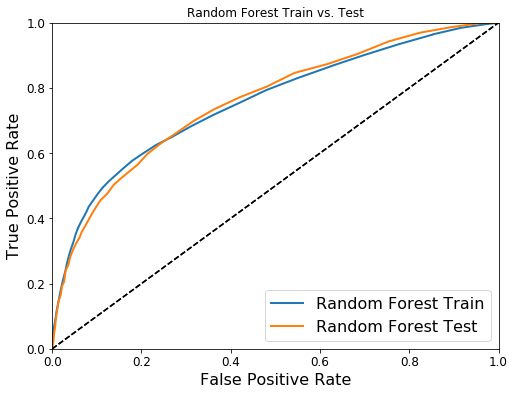

In [28]:
# Plot the test ROC curve. Compare with the train curve.
y_probas_forest_test = cross_val_predict(forest_clf, X_test_prepared, y_test, cv=5, method="predict_proba")
y_scores_forest_test = y_probas_forest_test[:, 1] 
fpr_forest_test, tpr_forest_test, thresholds_forest_test = roc_curve(y_test, y_scores_forest_test)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Train")
plot_roc_curve(fpr_forest_test, tpr_forest_test, "Random Forest Test")
plt.legend(loc="lower right", fontsize=16)
plt.title("Random Forest Train vs. Test")
plt.show()

In [32]:
# Print ROC AUC score
from sklearn.metrics import roc_auc_score

print("ROC AUC Random Forest on test data: ", roc_auc_score(y_test, y_scores_forest_test))

ROC AUC Random Forest on test data:  0.7586416712826999


### Conclusions

Explain your results and choices

I noted a few observations on the underlying data in the above section for 'Data Exploration'. I would still argue tweaking the raw features could improve the model. 

The best classifier model is Random Forest (RF) with n_estimators = 50. Since it is on the extreme parameter range, we could increase the number of estimators and evaluate performance. 

On RF, the training set and test set had an ROC AUC score of slightly above 0.75 with the test set performing slightly better (rounded 0.7552 vs. 0.7586) and can be visualized above in the Train vs. Test curve. 

For comparison, on KNN, the training set had an optimal score of 0.644277096639819 {'n_neighbors': 20}. However, this is again at an extreme parameter range and increasing the number of neighbors might be a worthwhile endeavor. 

Q2. (Optional) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion. 

### Conclusions


In [ ]:
### SORRY, no time for this! ###